# Introduction:

Author & Creator: Tahasin Shadat

---
*   Problem Statement:
  *   -

*   Project Objective:
  *   -

*   Real World Use Case:
  *   -

*   Coding Objective:
  *   Create an Image Classifier Model that can be used in many scenarios. In short, make a model that's reusable for many cases outside of detecting fires, smoke, and cracks.

* Note: This is my first solo ML project, and I hope to both learn a lot, and document what I learned well for future reference. If anything confuses you, just reach out and let me know, although most of the code is from a variety of tutorials and google searches.

---

## Here's a list of general things I've learned throughout this project:

* The Three different learning models:

  * Supervised Learning: In supervised learning, the algorithm is trained on a labeled dataset, meaning it learns from input-output pairs. For example, if you want a model to recognize handwritten digits, you'd provide images of digits along with their corresponding labels (0-9). The model learns to map inputs to outputs by finding patterns and relationships within the data.

  * Unsupervised Learning: In unsupervised learning, the algorithm is trained on unlabeled data, and the system tries to learn patterns and structures from the data without explicit supervision. Clustering algorithms like k-means or hierarchical clustering fall under this category, where the algorithm tries to identify inherent structures or groupings in the data.

  * Reinforcement Learning: In reinforcement learning, the model learns to make decisions by trial and error and receives feedback in the form of rewards or penalties.

#### Neural Networks:

* Artificial Neural Networks (ANNs): These are a type of machine learning model inspired by the human brain's structure. ANNs consist of interconnected nodes (neurons) organized in layers - input, hidden, and output layers. Each connection between neurons has a weight that is adjusted during the training process.

* Convolutional Neural Networks (CNNs): CNNs are a specialized type of neural network designed for processing structured grid-like data, such as images. They use convolutional layers that apply filters to input data, extracting features at different spatial locations. These networks have proven very effective in image recognition, object detection, and other computer vision tasks due to their ability to capture spatial hierarchies of features.

#### Pros and Cons:

* Supervised Learning:
  * Pros: Well-understood, effective for prediction tasks, can handle both regression and classification problems.
  * Cons: Requires labeled data which can be expensive and time-consuming to obtain. May not perform well with noisy or incomplete data.

* Unsupervised Learning:
  * Pros: Can discover hidden patterns in data without labeled examples.
  * Cons: Interpretability might be challenging, and evaluation of performance is subjective.

* Reinforcement Learning:
  * Pros: Suitable for sequential decision-making tasks, can learn optimal behavior through interactions with the environment.
  * Cons: Training can be computationally expensive, and the model's learning process might be unstable.

* Neural Networks:
  * Pros: Highly adaptable to different data types and can learn complex patterns. Effective for handling large datasets.
  * Cons: Training can be resource-intensive, requires a large amount of data, and can be prone to overfitting.

* Convolutional Neural Networks:
  * Pros: Excellent for image-related tasks, efficient at learning spatial hierarchies of features.
  * Cons: Requires substantial computational resources, and interpretability of learned features can be challenging.


Note: I will also be explaining my code and thinking process throughout the notebook

---
## Resources that guided me:
  * Nicholas Rennotte
  * IvyProSchool
  * Sagar G. Sangodkar
  * Cassie Kozyrkov
  * Colab Docs
  * GitHub
  * ChatGPT
  * StackOverFlow
  * w3schools

Please check these youtubers and resources out, they are very helpful!


# 1) Setup and Load Data

### 1.1) Install Dependencies and Setup

In [ ]:
# !pip install tensorflow tensorflow-gpu opencv-python matplotlib

In [ ]:
# !pip list

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: ignored

In [ ]:
import tensorflow as tf
import os

In [ ]:
"""
Normally TensorFlow would just take up all the VRAM on your PC, so we are setting GPU memory consumption growth
In essence, it's saying: Hey TensorFlow, RELAX MATE, dont use up all of my memory, keep it to whatever you need
"""

gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)


### 1.2) Remove BAD Data (Images)

In [ ]:
import cv2
import imghdr
from matplotlib import pyplot as plt

In [ ]:
data_dir = 'drive/MyDrive/project_TRACER_fire_data'
# os.listdir(data_dir) -> Returns the dataset we are using
# os.listdir(os.path.join(data_dir, 'fire')) -> Returns whats inside the dataset

In [ ]:
image_exts = ['png', 'jpg', 'jpeg']

In [ ]:
# Go inside and loop through whats inside the data directory
for image_class in os.listdir(data_dir):
    # print(image_class)

    # then, loop through every image
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image) # represents the image itself
        try:
            img = cv2.imread(image_path) # Set the image as a numpy array
            tip = imghdr.what(image_path)
            if tip not in image_exts: # If the images extension isn't in the list above
                print('Image type not supported {}'.format(image_path))
                os.remove(image_path) # Delete the file (image)
        except Exception as e:
            print('Problem Occured with Image {}'.format(image_path))
            # os.remove(image_path)


### 1.3) Load Data (Images)

Some notes while doing research on this step:
```
# tf.data.Dataset -> A tensorFlow dataset API
```

> Rather than loading everything into memory to begin with it allows you to create data pipelines

Data pipelines:
* Makes the model more scalable for larger datasets
* Gives the program a repeatable set of steps to apply to the data

Note: VERY VERY USEFUL, WILL BE EXPERIMENTING WITH THIS IN OTHER AI MODELS I WILL CREATE IN THE FUTURE



In [ ]:
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
data = tf.keras.utils.image_dataset_from_directory('drive/MyDrive/project_TRACER_fire_data') # automatically sets batchsize to 32, but it is configureable
"""
-> keras is using tensorflows dataset API for this!
-> This function builds an image dataset for me
    -> meaning that I dont have to build the labels or classes, it does it for me
    -> Also does tons of preprocessing to resize images as well

-> Can't just do data[0] to access the first instance because it isnt a dataset that is preloaded into memory
-> Instead, it acts as a generator, meaning I have to grab the data that I want on the fly
"""

In [ ]:
 # convert the data to an iterator, allowing us access to the generator and get consecutive batches using the .next operator
data_iterator = data.as_numpy_iterator()

In [ ]:
batch = data_iterator.next() # grab a batch from the iterator (can be ran multiple times to get different datasets)
"""
So what is a batch?
-> Instead of processing the entire dataset at once, the data is divided into smaller batches. This helps manage memory and computational resources during training.

Now, how is the dataset split up?
It's split up into 2:
    1) The images
        -> The image representation is => Images from the directory that are loaded into memory as a set of numpy arrays
    2) The labels

"""

In [ ]:
# Images represented as numpy arrays:
batch[0].shape

In [ ]:
# The label representation:
batch[1]

In short, the past three lines did this:

* line 1: Building the data pipeline

* line 2: Allow Access to the pipeline

* line 3: Accessing the data pipeline

In [ ]:
fig, ax = plt.subplots(ncols = 4, figsize = (20, 20)) # plot out 4 images

# Checks which kind of class is assigned to which kind of image because I didnt do the labeling, keras did
# This will help us create a key to refer too
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int)) # Show the image
    ax[idx].title.set_text(batch[1][idx]) # Show the images label

Currently there is only one dataset, so the key is simple:

> Class 0 = Fire

> Class 1 = Not Fire


# 2) Preprocess Data

Notes going into this section:

```
batch[0].max()
-> will return 255.0

batch[0].min()
-> will return 0.0

```
These are the RGB value range of the images

It's best to have the values as small as possible to help optimize the model and make it much faster


Solution:

```
batch[0] / 255
```

Because I'm using a data pipeline, I can't be doing this every single time I load up a batch, because it's inefficient

So what I can do is do that operation as we are loading in the data through the data pipeline

### 2.1) Scale Data

In [ ]:
data = data.map(lambda x, y: (x/255, y))
"""
Map allows for a particular transformation as the data is being preprocessed

data.map allows the transofmration to be done INSIDE the pipeline, using a lambda function

x represents the images
y represents the labels (will not be transforming the labels)
"""

'\nMap allows for a particular transformation as the data is being preprocessed\n\ndata.map allows the transofmration to be done INSIDE the pipeline, using a lambda function\n\nx represents the images\ny represents the labels (will not be transforming the labels)\n'

In [ ]:
scaled_iterator = data.as_numpy_iterator()
batch = scaled_iterator.next()

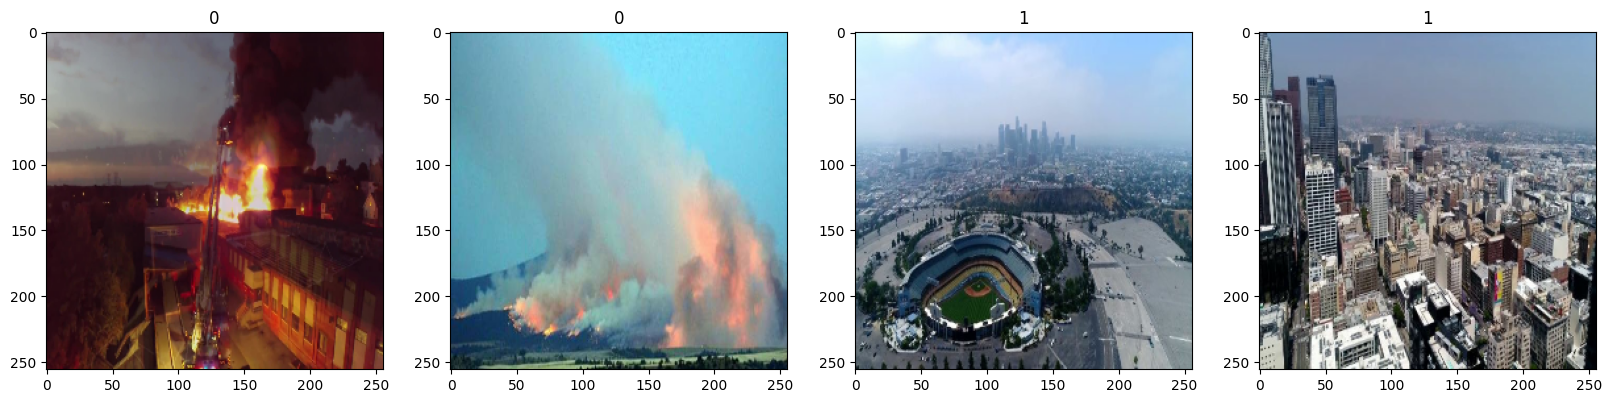

In [ ]:
# Replot data to check if scaling worked
fig, ax = plt.subplots(ncols = 4, figsize = (20, 20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img) # Can't have it as an int because I divided by 255
    ax[idx].title.set_text(batch[1][idx])

### 2.2) Split Data

In [ ]:
len(data) # To check the batch size

132

In [ ]:
# MUST BE RE ADJUSTED BASED ON DATA SIZE
train_size = int(len(data) * 0.7)
val_size = int(len(data) * 0.2) + 1
test_size = int(len(data) * 0.1)

In [ ]:
# See sizes of each to check
print(train_size)
print(val_size)
print(test_size)
# Should add up to len(data)

92
27
13


In [ ]:
train = data.take(train_size) # saying how many batches I want to allocate to training data
val = data.skip(train_size).take(val_size) # Skip the batches allocated to the training partition, then allocate the next val_size amount to the validation data
test = data.skip(train_size + val_size).take(test_size) # Skip the batches allocated to training and validation, then allocate the next test_size amount to the test data (everything left over)

# 3) The Deep Learning Model

---
Some images to help vizualize how it works:

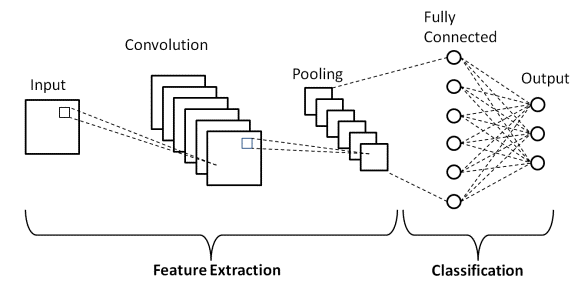

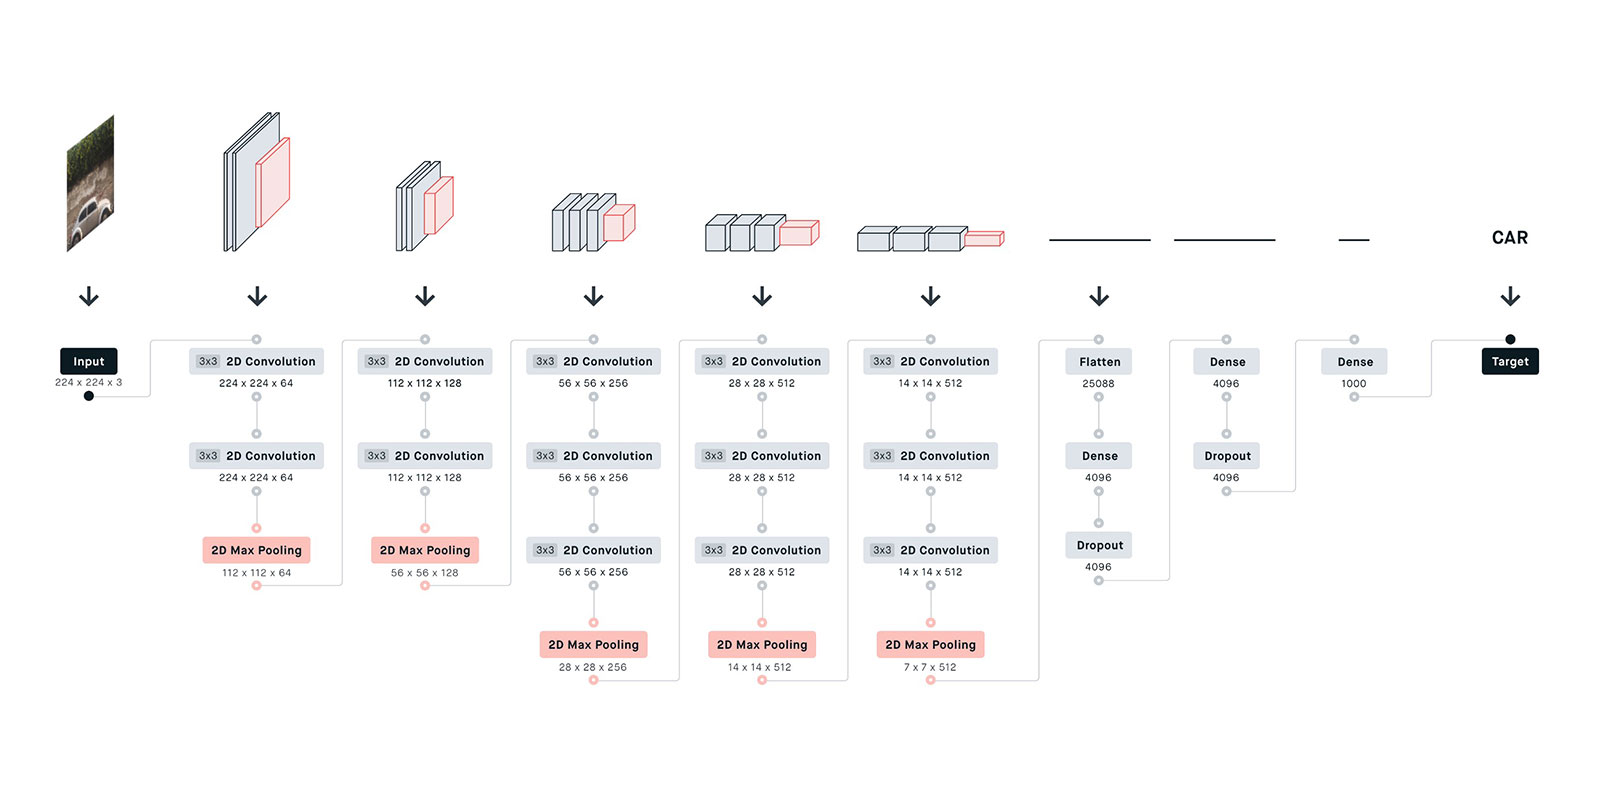

Note: These are demonstrating a Sequential Model

### 3.1) Build Deep Learning Model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

"""
------------------------------
Sequential API:
-> Great for 1 input and 1 output

Functional API:
-> Great for multiple inputs and multiple outputs
-> More advanced
-----------------------------------------------

Conv2D: 2D Convolution Layer (Spacial Convolution over images)
MaxPool2D: Kind of like a condensing layer
    -> Goes thru the images and condeses it
    -> Gets the max value of a region, and then returns that region
Dense: Fully connected layer
Flatten: Allows us to go from a convoilution layer (which has channels and kernels) to a data format that can be read by the Dense layer
DropOut: Used for Regularization

-----------------------------------------------------------------

Architectures:
    -> A bunch of layers and hidden layers that create the Learning model (AI)

"""

'\n------------------------------\nSequential API:\n-> Great for 1 input and 1 output\n\nFunctional API:\n-> Great for multiple inputs and multiple outputs\n-> More advanced\n-----------------------------------------------\n\nConv2D: 2D Convolution Layer (Spacial Convolution over images)\nMaxPool2D: Kind of like a condensing layer\n    -> Goes thru the images and condeses it\n    -> Gets the max value of a region, and then returns that region\nDense: Fully connected layer\nFlatten: Allows us to go from a convoilution layer (which has channels and kernels) to a data format that can be read by the Dense layer\nDropOut: Used for Regularization\n\n-----------------------------------------------------------------\n\nArchitectures:\n    -> A bunch of layers and hidden layers that create the Learning model (AI)\n\n'

In [ ]:
model = Sequential() # Model can also be added in here like: (Conv2D, MaxPooling2D(), etc)

In [ ]:
# First Convolution Block
model.add( Conv2D(16, (3, 3), 1, activation="relu", input_shape=(256, 256, 3)) )
model.add( MaxPooling2D() )

# Second Convolution Block
model.add( Conv2D(32, (3, 3), 1, activation="relu") )
model.add( MaxPooling2D() )

# Third Convolution Block
model.add( Conv2D(16, (3, 3), 1, activation="relu") )
model.add( MaxPooling2D() )

model.add( Flatten() )

model.add( Dense(256, activation="relu") )
model.add( Dense(1, activation='sigmoid') )


In [ ]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])
"""
Parameters:
1: optimizer (there are many)
2: loss:  this model is performing a binary classification
3: metrics: what we want to track, can be changed to many others
"""

'\nParameters:\n1: optimizer (there are many)\n2: loss:  this model is performing a binary classification\n3: metrics: what we want to track, can be changed to many others\n'

In [ ]:
model.summary() # by looking at this, we can see how it works and how the layers are affecting the output

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 16)        0

#### Model Explained:

---
Conv2D(filters, filterSize, stride, type of activation, input shape):

* Filters: Sections to scan over an image and get the relevant info from it
* Filter Size: How big the filter is
* Stride: How much the filter will move each time
    * The filter will be applied to one 3 x 3 section, then move over 1 pixel, and then reapply the filter, and so on and so forth

* Activation: The type of function the image data (or output from a layer) gets passed through to modify the output
    * Relu Activations:
        * Any output below zero goes to zero, and preserve the positive values
        * Helps us take into account any nonlinear patterns
    * Sigmoid Activation:
        * Takes any output and converts it into a range between 0 and 1 (which map to our classes)

* Input Shape:
    * Resizes the image 256 x 256 and sets it to 3 channels deep
    * Only passed through the first layer

### Types of Activations Graphed:

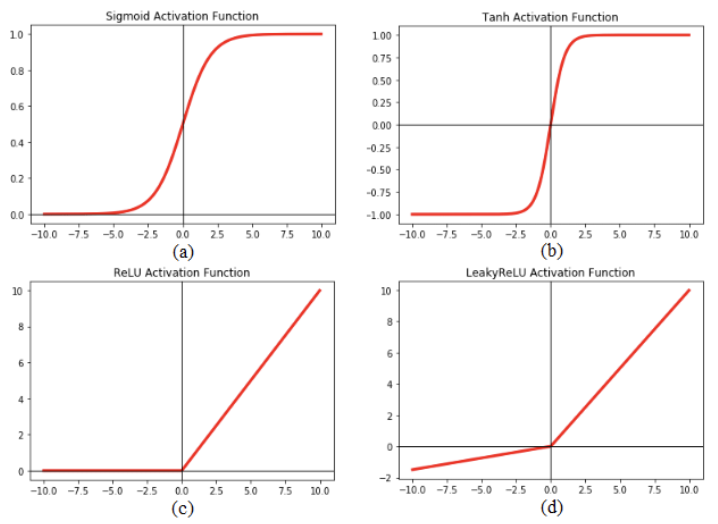


> If you have NO ACTIVATIONS, you end up creating a deep neural network, which is linear in nature and not that powerful

---

MaxPool2D():
* Happens after the relu activation
* Condenses the info over a set region and scans for the max values
* Returns the max values in the form of channel values

---

Flatten():
* Takes a channel value (what the filters return) and condenses it into 1 value

---

Dense(neurons, activation type):
* Neurons: The amount of neurons in your fully connected layer
* Go from 256 neurons to 1 neuron, returning 1 output

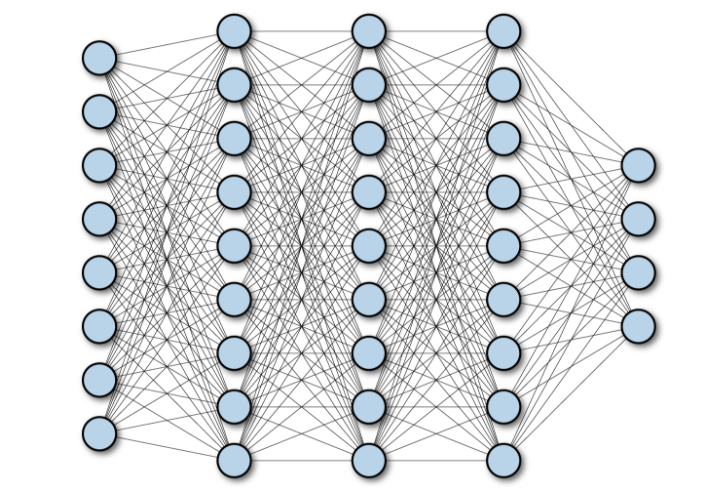


> The Fully Connected layer Visualized
---

Changing the parameters in each of the functions above are called architectural decisions:
* Chanaging the paarameters of these, as well as the amount of layers, is what affects the outcome of the model
* It's hard to predict what the new outcome will be

Note: There are many more parameters in each function that I did not go over

### 3.2) Train the Model

In [ ]:
logdir = 'logs'

In [ ]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)
"""
-> Useful for saving the model at a particular checkpoint
-> Useful for specific logging as well
-> Will be logging out the training data
"""

'\n-> Useful for saving the model at a particular checkpoint\n-> Useful for specific logging as well\n-> Will be logging out the training data\n'

In [ ]:
hist = model.fit(train, epochs=10, validation_data=val, callbacks=[tensorboard_callback])
"""
train: takes in the training data
epochs: How long you train for
    -> 1 epoch is 1 run over the entire training dataset
validation data: Run an evaluation on the validation data to see how well the model is doing in real time
callbacks: Log out all the info from the model into tensorboard

I'll be using hist to plot the data
"""

Epoch 1/10
92/92 [==============================] - 265s 3s/step - loss: 0.1852 - accuracy: 0.9344 - val_loss: 0.2020 - val_accuracy: 0.9363
Epoch 2/10
92/92 [==============================] - 273s 3s/step - loss: 0.1405 - accuracy: 0.9497 - val_loss: 0.1531 - val_accuracy: 0.9525
Epoch 3/10
92/92 [==============================] - 231s 2s/step - loss: 0.1240 - accuracy: 0.9603 - val_loss: 0.1831 - val_accuracy: 0.9468
Epoch 4/10
92/92 [==============================] - 226s 2s/step - loss: 0.0765 - accuracy: 0.9752 - val_loss: 0.1646 - val_accuracy: 0.9549
Epoch 5/10
92/92 [==============================] - 279s 3s/step - loss: 0.0627 - accuracy: 0.9796 - val_loss: 0.1701 - val_accuracy: 0.9537
Epoch 6/10
92/92 [==============================] - 267s 3s/step - loss: 0.0456 - accuracy: 0.9871 - val_loss: 0.1830 - val_accuracy: 0.9525
Epoch 7/10
92/92 [==============================] - 265s 3s/step - loss: 0.0372 - accuracy: 0.9905 - val_loss: 0.2110 - val_accuracy: 0.9549
Epoch 8/10
92

### 3.3) Plot Performance


If Loss doesnt go down:
* Consider:
    * Creating a larger neural network
    * Change your training data
    * May have to regularize data

In [ ]:
fig = plt.figure() # Use matplotlib
plt.plot(hist.history['loss'], color="teal", label="loss") # grab training loss
plt.plot(hist.history['val_loss'], color="orange", label="val_loss") # grab validation loss
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [ ]:
fig = plt.figure() # Use matplotlib
plt.plot(hist.history['accuracy'], color="teal", label="accuracy") # grab training accuracy
plt.plot(hist.history['val_accuracy'], color="orange", label="val_accuracy") # grab validation accuracy
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# 4) Evaluate Performance Of Model

### 4.1) Evaluate

In [ ]:
# Different measures used for Classification Problems
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [ ]:
precision = Precision()
recall = Recall()
accuracy = BinaryAccuracy()

In [ ]:
for batch in test.as_numpy_iterator(): # Loop through each batch in the testing data
    x, y = batch # unpack the batch x-> images, y-> labels
    prediction_result = model.predict(x) # run the model on our test data
    # See how well it does on our test data
    precision.update_state(y, prediction_result)
    recall.update_state(y, prediction_result)
    accuracy.update_state(y, prediction_result)

1/1 [==============================] - 0s 290ms/step


In [ ]:
precision_result = precision.result().numpy()
recall_result = recall.result().numpy()
accuracy_result = accuracy.result().numpy()
# Print out the performance, the higher the number, the better
print(f'Precision: {precision_result}, Recall: {recall_result}, Accuracy: {accuracy_result}')

Precision: 0.0, Recall: 0.0, Accuracy: 1.0


### 4.2) Test

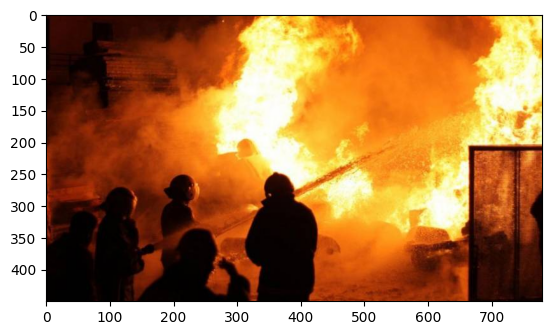

In [ ]:
# Use an image the model has never seen before to see how well it does
img = cv2.imread('Fire (36).png') # insert test image path
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)) # Vizualize the image in it's normal color
plt.show()

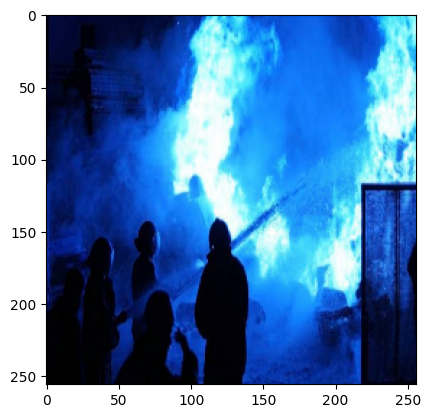

In [ ]:
resized_img = tf.image.resize(img, (256, 256)) # must resize image to 256x256 to run it through the AI
plt.imshow(resized_img.numpy().astype(int))
plt.show()

> Next thing I need to do is pass the test image through to the model, but the model takes in batches of data (images). To combat this, I need to encapsulate the data inside a list.

In [ ]:
encasulated_image = np.expand_dims(resized_img / 255, 0)

In [ ]:
prediction_result = model.predict(encasulated_image) # passing it through the model

1/1 [==============================] - 0s 36ms/step


In [ ]:
if prediction_result < 0.5:
    print("Predicited class is fire")
else:
    print("Predicited class is not fire")

print(prediction_result[0])

NameError: ignored

# 5) Save the Model

### 5.1) Save the Model

In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
model.save(os.path.join('models', 'fire_classifier_model.h5')) # save the model via serialization

NameError: name 'model' is not defined

In [ ]:
new_model = load_model(os.path.join('models', 'fire_classifier_model.h5')) # load up a saved model

In [ ]:
new_prediction = new_model.predict(np.expand_dims(resized_img, 0)) # make a new prediction from the saved model

1/1 [==============================] - 0s 63ms/step


In [ ]:
# get result
if new_prediction == 1:
    print("Predicited class is fire")
else:
    print("Predicited class is not fire")

Predicited class is not fire
1.0


# 6) Final Result

> Just to make life easier, here are functions that will do everything above

# Conclusion
